In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, RK23, RK45

# Métodos Numéricos: Runge-Kutta de Segundo Orden

Los algoritmos de Runge-Kutta son particularmente importantes para resolver ecuaciones diferenciales ordinarias (EDOs). Dentro de estos, tenemos el método de Runge-Kutta de segundo orden (RK2), también conocido como método de Heun o método del punto medio. Este método proporciona una aproximación más precisa que el método de Euler, manteniendo una complejidad computacional razonable.


Consideremos una ecuación diferencial ordinaria de primer orden con un valor inicial:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$

Nuestro objetivo es encontrar una aproximación numérica de $y(x)$ en un conjunto discreto de puntos $x_0, x_1, x_2, ..., x_n$.

## Método de Euler

Antes de abordar el método RK2, recordemos el método más simple, el método de Euler:

$$y_{n+1} = y_n + h \cdot f(x_n, y_n)$$

donde $h = x_{n+1} - x_n$ es el tamaño del paso.

El método de Euler utiliza solamente la información de la pendiente al inicio del intervalo, lo que lo hace simple pero relativamente impreciso.

## Método de Runge-Kutta de Segundo Orden (RK2)

El método RK2 mejora la precisión al utilizar una combinación ponderada de dos evaluaciones de la función $f(x, y)$ en diferentes puntos del intervalo. La fórmula general es:

$$y_{n+1} = y_n + h \cdot (a_1 k_1 + a_2 k_2)$$

Donde:
- $k_1 = f(x_n, y_n)$ (pendiente al inicio del intervalo)
- $k_2 = f(x_n + p_1 h, y_n + p_2 h k_1)$ (pendiente en un punto intermedio o al final)
- $a_1, a_2, p_1, p_2$ son parámetros que definen el método específico

Para que el método sea de segundo orden, estos parámetros deben satisfacer ciertas condiciones:
- $a_1 + a_2 = 1$ (consistencia)
- $a_2 p_1 = \frac{1}{2}$ (condición de orden 2)

Existen varias variantes del método RK2, dependiendo de la elección de estos parámetros.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Runge-Kutta_slopes.svg/1920px-Runge-Kutta_slopes.svg.png)

### Método del Punto Medio (Midpoint Method)

En el método del punto medio, usamos:
- $a_1 = 0, a_2 = 1, p_1 = \frac{1}{2}, p_2 = \frac{1}{2}$

Lo que nos da:
- $k_1 = f(x_n, y_n)$
- $k_2 = f(x_n + \frac{h}{2}, y_n + \frac{h}{2} k_1)$
- $y_{n+1} = y_n + h \cdot k_2$

Este método evalúa la función en el punto medio del intervalo, utilizando la pendiente inicial para llegar a ese punto.

### Método de Heun

En el método de Heun, usamos:
- $a_1 = \frac{1}{2}, a_2 = \frac{1}{2}, p_1 = 1, p_2 = 1$

Lo que nos da:
- $k_1 = f(x_n, y_n)$
- $k_2 = f(x_n + h, y_n + h k_1)$
- $y_{n+1} = y_n + \frac{h}{2} \cdot (k_1 + k_2)$

Este método es esencialmente un promedio entre la pendiente al inicio y al final del intervalo.

### Método de Ralston (Ralston's Method)

En el método de Ralston, usamos:
- $a_1 = \frac{1}{4}, a_2 = \frac{3}{4}, p_1 = \frac{2}{3}, p_2 = \frac{2}{3}$

Lo que nos da:
- $k_1 = f(x_n, y_n)$
- $k_2 = f(x_n + \frac{2h}{3}, y_n + \frac{2h}{3} k_1)$
- $y_{n+1} = y_n + h \cdot (\frac{1}{4}k_1 + \frac{3}{4}k_2)$

Este método está optimizado para minimizar el error de truncamiento.

## Análisis de Error

El método de Euler tiene un error local de truncamiento de orden $O(h^2)$ y un error global de orden $O(h)$.

El método RK2, en cualquiera de sus variantes, tiene un error local de truncamiento de orden $O(h^3)$ y un error global de orden $O(h^2)$, lo que lo hace significativamente más preciso que el método de Euler.


## Ejemplo

Consideremos la ecuación diferencial:

$$\frac{dy}{dx} = y, \quad y(0) = 1$$

La solución analítica de esta ecuación es $y(x) = e^x$.

Vamos a calcular $y(0.1)$ y $y(0.2)$ utilizando un tamaño de paso $h = 0.1$ con ambos métodos.

### Solución Analítica en los Primeros Puntos

- $y(0) = e^0 = 1$
- $y(0.1) = e^{0.1} \approx 1.10517$
- $y(0.2) = e^{0.2} \approx 1.22140$

### Solución con el Método del Punto Medio

**Paso 1**: Calcular $y(0.1)$ dado $y(0) = 1$

$$k_1 = f(0, 1) = 1$$
$$k_2 = f(0 + \frac{0.1}{2}, 1 + \frac{0.1}{2} \cdot 1) = f(0.05, 1.05) = 1.05$$
$$y(0.1) = 1 + 0.1 \cdot 1.05 = 1 + 0.105 = 1.105$$

**Paso 2**: Calcular $y(0.2)$ dado $y(0.1) = 1.105$

$$k_1 = f(0.1, 1.105) = 1.105$$
$$k_2 = f(0.1 + \frac{0.1}{2}, 1.105 + \frac{0.1}{2} \cdot 1.105) = f(0.15, 1.16025) = 1.16025$$
$$y(0.2) = 1.105 + 0.1 \cdot 1.16025 = 1.105 + 0.116025 = 1.22103$$

### Solución con el Método de Heun

**Paso 1**: Calcular $y(0.1)$ dado $y(0) = 1$

$$k_1 = f(0, 1) = 1$$
$$k_2 = f(0 + 0.1, 1 + 0.1 \cdot 1) = f(0.1, 1.1) = 1.1$$
$$y(0.1) = 1 + \frac{0.1}{2} \cdot (1 + 1.1) = 1 + 0.05 \cdot 2.1 = 1 + 0.105 = 1.105$$

**Paso 2**: Calcular $y(0.2)$ dado $y(0.1) = 1.105$

$$k_1 = f(0.1, 1.105) = 1.105$$
$$k_2 = f(0.1 + 0.1, 1.105 + 0.1 \cdot 1.105) = f(0.2, 1.2155) = 1.2155$$
$$y(0.2) = 1.105 + \frac{0.1}{2} \cdot (1.105 + 1.2155) = 1.105 + 0.05 \cdot 2.3205 = 1.105 + 0.116025 = 1.22103$$

### Comparación con la Solución Analítica
| $x$ | Solución Analítica | Punto Medio | Error Punto Medio | Heun | Error Heun |
|-----|-------------------|-------------|------------------|------|------------|
| 0.0 | 1.00000 | 1.00000 | 0.00000 | 1.00000 | 0.00000 |
| 0.1 | 1.10517 | 1.10500 | 0.00017 | 1.10500 | 0.00017 |
| 0.2 | 1.22140 | 1.22103 | 0.00037 | 1.22103 | 0.00037 |

Interesantemente, para este ejemplo particular, ambos métodos arrojan exactamente el mismo resultado.



In [ ]:
def RK2_midpoint(f, x0, y0, h, x_end):
    """
    Método de Runge-Kutta de segundo orden (método del punto medio).

    Args:
        f: Función que define la EDO dy/dx = f(x, y)
        x0: Valor inicial de x
        y0: Valor inicial de y
        h: Tamaño del paso
        x_end: Valor final de x

    Returns:
        x_points: Valores de x
        y_points: Aproximación numérica de y
    """
    n = int(abs(x_end - x0) / h)
    x_points = np.zeros(n+1)
    y_points = np.zeros(n+1)

    x_points[0] = x0
    y_points[0] = y0

    for i in range(n):
        x = x_points[i]
        y = y_points[i]

        k1 = f(x, y)
        k2 = f(x + h/2, y + h/2 * k1)

        x_points[i+1] = x + h
        y_points[i+1] = y + h * k2

    return x_points, y_points

In [ ]:
def RK2_heun(f, x0, y0, h, x_end):
  '''
  Método de Runge-Kutta de segundo orden (método de Heun).

  Args:
      f: Función que define la EDO dy/dx = f(x, y)
      x0: Valor inicial de x
      y0: Valor inicial
      h: Tamaño del paso
      x_end: Valor final de x

  Returns:
      x_points: Valores de x
      y_points: Aproximación numérica de y
  '''
  n = int(abs(x_end - x0) / h)
  x_points = np.zeros(n+1)
  y_points = np.zeros(n+1)

  x_points[0] = x0
  y_points[0] = y0

  for i in range(n):
      x = x_points[i]
      y = y_points[i]

      k1 = f(x, y)
      k2 = f(x + h, y + h * k1)

      x_points[i+1] = x + h
      y_points[i+1] = y + h/2 * (k1 + k2)

  return x_points, y_points

In [ ]:
def RK2_Ralston(f, x0, y0, h, x_end):
  '''
  Método de Runge-Kutta de segundo orden (método de Ralston).

  Args:
      f: Función que define la EDO dy/dx = f(x, y)
      x0: Valor inicial de x
      y0: Valor inicial
      h: Tamaño del paso
      x_end: Valor final de x
  Rerurns:
      x_points: Valores de x
      y_points: Aproximación numérica de y
  '''
  n = int(abs(x_end - x0) / h)
  x_points = np.zeros(n+1)
  y_points = np.zeros(n+1)

  x_points[0] = x0
  y_points[0] = y0

  for i in range(n):
      x = x_points[i]
      y = y_points[i]

      k1 = f(x, y)
      k2 = f(x + 2*h/3, y + 2*h/3 * k1)

      x_points[i+1] = x + h
      y_points[i+1] = y + h/4 * (k1 + 3*k2)

  return x_points, y_points

## Ejemplo Práctico

Vamos a resolver la ecuación diferencial $\frac{dy}{dx} = y - x^2 + 1$ con condición inicial $y(0) = 0.5$ en el intervalo $[0, 2]$.

La solución analítica de esta ecuación es $y(x) = (x+1)^2 - 0.5e^x$.


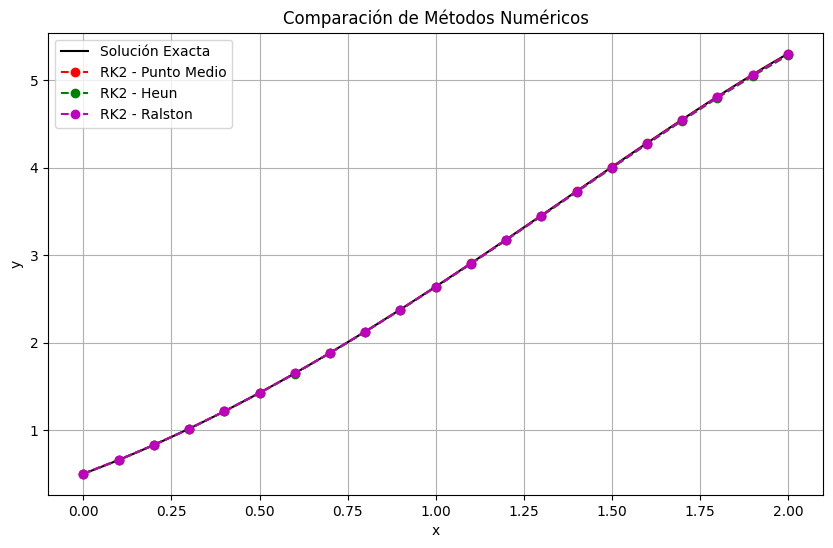

Error máximo (Punto Medio): 3.747074e-03
Error máximo (Heun): 1.890478e-02
Error máximo (Ralston): 8.799641e-03


In [ ]:
def f(x, y):
    return y - x**2 + 1

def exact_solution(x):
    return (x+1)**2 - 0.5*np.exp(x)

# Parámetros
x0 = 0.0
y0 = 0.5
h = 0.1
x_end = 2.0

# Resolver con los diferentes métodos
x_midpoint, y_midpoint = RK2_midpoint(f, x0, y0, h, x_end)
x_heun, y_heun = RK2_heun(f, x0, y0, h, x_end)
x_ralston, y_ralston = RK2_Ralston(f, x0, y0, h, x_end)

# Calcular la solución exacta
x_exact = np.linspace(x0, x_end, 100)
y_exact = exact_solution(x_exact)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(x_exact, y_exact, 'k-', label='Solución Exacta')
plt.plot(x_midpoint, y_midpoint, 'r--o', label='RK2 - Punto Medio')
plt.plot(x_heun, y_heun, 'g--o', label='RK2 - Heun')
plt.plot(x_ralston, y_ralston, 'm--o', label='RK2 - Ralston')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de Métodos Numéricos')
plt.legend()
plt.grid(True)
plt.savefig('comparacion_metodos.png')
plt.show()

# Calcular y mostrar errores
def calculate_error(y_approx, x_points):
    y_true = exact_solution(x_points)
    error = np.abs(y_approx - y_true)
    return np.max(error)


print(f"Error máximo (Punto Medio): {calculate_error(y_midpoint, x_midpoint):.6e}")
print(f"Error máximo (Heun): {calculate_error(y_heun, x_heun):.6e}")
print(f"Error máximo (Ralston): {calculate_error(y_ralston, x_ralston):.6e}")

# Método de Runge-Kutta de 4º orden


El método de Runge-Kutta de 4º orden (RK4) es una técnica numérica para resolver ecuaciones diferenciales ordinarias (EDOs) de la forma:

$$\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0$$

Este método proporciona una aproximación de alta precisión comparado con métodos más simples como Euler, utilizando una combinación ponderada de evaluaciones de la función en diferentes puntos dentro del intervalo de integración.

### Fórmula general

Para avanzar desde un punto $(x_n, y_n)$ al siguiente punto $(x_{n+1}, y_{n+1})$ con un paso $h$, el método RK4 utiliza:

$$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$

donde:

$$k_1 = h \cdot f(x_n, y_n)$$
$$k_2 = h \cdot f(x_n + \frac{h}{2}, y_n + \frac{k_1}{2})$$
$$k_3 = h \cdot f(x_n + \frac{h}{2}, y_n + \frac{k_2}{2})$$
$$k_4 = h \cdot f(x_n + h, y_n + k_3)$$


Cada $k_i$ representa una pendiente:
- $k_1$: pendiente al inicio del intervalo
- $k_2$: pendiente en el punto medio usando $k_1$
- $k_3$: pendiente en el punto medio usando $k_2$
- $k_4$: pendiente al final del intervalo usando $k_3$

La combinación ponderada de estas pendientes proporciona una aproximación de cuarto orden, lo que significa que el error por paso es proporcional a $h^5$, mientras que el error global acumulado es proporcional a $h^4$.

## Algoritmo de implementación

1. Definir la función $f(x, y)$ de la EDO
2. Establecer valores iniciales $x_0$, $y_0$
3. Seleccionar el tamaño de paso $h$ y el número de pasos $n$
4. Para cada paso $i$ desde 0 hasta $n-1$:
   - Calcular $k_1 = h \cdot f(x_i, y_i)$
   - Calcular $k_2 = h \cdot f(x_i + \frac{h}{2}, y_i + \frac{k_1}{2})$
   - Calcular $k_3 = h \cdot f(x_i + \frac{h}{2}, y_i + \frac{k_2}{2})$
   - Calcular $k_4 = h \cdot f(x_i + h, y_i + k_3)$
   - Actualizar $y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$
   - Actualizar $x_{i+1} = x_i + h$



## Ejemplo
Resolver
$$\frac{dy}{dx} = y, \quad y(0) = 1$$

La solución analítica es $y = e^x$


**Datos iniciales:**
- $x_0 = 0$
- $y_0 = 1$
- $h = 0.2$ (tamaño de paso)
- $f(x, y) = y$

**Primer paso:** Calcular $y_1$ a partir de $y_0$

1. Calcular $k_1$:
   $$k_1 = h \cdot f(x_0, y_0) = 0.2 \cdot 1 = 0.2$$

2. Calcular $k_2$:
   $$k_2 = h \cdot f(x_0 + \frac{h}{2}, y_0 + \frac{k_1}{2})$$
   $$k_2 = 0.2 \cdot f(0 + 0.1, 1 + 0.1)$$
   $$k_2 = 0.2 \cdot 1.1 = 0.22$$

3. Calcular $k_3$:
   $$k_3 = h \cdot f(x_0 + \frac{h}{2}, y_0 + \frac{k_2}{2})$$
   $$k_3 = 0.2 \cdot f(0 + 0.1, 1 + 0.11)$$
   $$k_3 = 0.2 \cdot 1.11 = 0.222$$

4. Calcular $k_4$:
   $$k_4 = h \cdot f(x_0 + h, y_0 + k_3)$$
   $$k_4 = 0.2 \cdot f(0 + 0.2, 1 + 0.222)$$
   $$k_4 = 0.2 \cdot 1.222 = 0.2444$$

5. Calcular $y_1$:
   $$y_1 = y_0 + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$$
   $$y_1 = 1 + \frac{1}{6}(0.2 + 2 \cdot 0.22 + 2 \cdot 0.222 + 0.2444)$$
   $$y_1 = 1 + \frac{1}{6}(0.2 + 0.44 + 0.444 + 0.2444)$$
   $$y_1 = 1 + \frac{1}{6} \cdot 1.3284 = 1 + 0.2214 = 1.2214$$

6. Actualizar $x_1$:
   $$x_1 = x_0 + h = 0 + 0.2 = 0.2$$

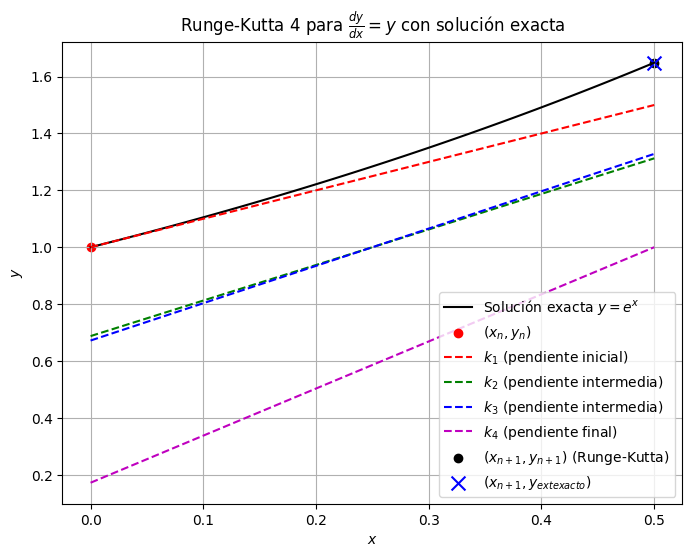

In [ ]:
def f(x, y):
    return y  # Ecuación diferencial dy/dx = y

# Parámetros
x_n = 0   # Punto inicial
y_n = 1   # Condición inicial
h = 0.5   # Paso

# Cálculo de los k de Runge-Kutta 4
k1 = h * f(x_n, y_n)
k2 = h * f(x_n + h/2, y_n + k1/2)
k3 = h * f(x_n + h/2, y_n + k2/2)
k4 = h * f(x_n + h, y_n + k3)

# Aproximación con Runge-Kutta 4
y_next = y_n + (k1 + 2*k2 + 2*k3 + k4) / 6

# Solución exacta de dy/dx = y con y(0) = 1 -> y = e^x
x_exact = np.linspace(x_n, x_n + h, 100)
y_exact = np.exp(x_exact)

# Puntos para mostrar las pendientes k1, k2, k3, k4
x_vals = np.array([x_n, x_n + h])
y_k1 = y_n + (x_vals - x_n) * (k1 / h)
y_k2 = y_n + (x_vals - (x_n + h/2)) * (k2 / h)
y_k3 = y_n + (x_vals - (x_n + h/2)) * (k3 / h)
y_k4 = y_n + (x_vals - (x_n + h)) * (k4 / h)

# Gráfica
plt.figure(figsize=(8, 6))

# Solución exacta
plt.plot(x_exact, y_exact, 'k-', label=r'Solución exacta $y = e^x$')

# Punto inicial
plt.scatter(x_n, y_n, color='red', label=r'$(x_n, y_n)$')

# Rectas de pendiente k1, k2, k3, k4
plt.plot(x_vals, y_k1, 'r--', label=r'$k_1$ (pendiente inicial)')
plt.plot(x_vals, y_k2, 'g--', label=r'$k_2$ (pendiente intermedia)')
plt.plot(x_vals, y_k3, 'b--', label=r'$k_3$ (pendiente intermedia)')
plt.plot(x_vals, y_k4, 'm--', label=r'$k_4$ (pendiente final)')

# Punto final estimado
plt.scatter(x_n + h, y_next, color='black', label=r'$(x_{n+1}, y_{n+1})$ (Runge-Kutta)')

# Punto exacto
plt.scatter(x_n + h, np.exp(x_n + h), color='blue', marker='x', s=100, label=r'$(x_{n+1}, y_{	ext{exacto}})$')

# Configuración de la gráfica
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Runge-Kutta 4 para $\frac{dy}{dx} = y$ con solución exacta')
plt.legend()
plt.grid()
plt.show()

In [ ]:
def RK2_midpoint(f, x0, y0, h, x_end):
    '''
    Método de Runge-Kutta de 2º orden (método del punto medio).

    Args:
        f: Función que define la EDO dy/dx = f(x, y)
        x0: Valor inicial de x
        y0: Valor inicial de y
        h: Tamaño del paso
        x_end: Valor final de x

    Returns:
        x_points: Valores de x
        y_points: Aproximación numérica de y
    '''
    # Redondear para asegurar que se alcanza x_end
    n = int(np.round((x_end - x0) / h))
    x_points = np.zeros(n+1)
    y_points = np.zeros(n+1)

    x_points[0] = x0
    y_points[0] = y0

    for i in range(n):
        x = x_points[i]
        y = y_points[i]

        # Cálculo de k1 y k2 según el método del punto medio
        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)

        # Actualizar valores
        x_points[i+1] = x + h
        y_points[i+1] = y + k2

    # Asegurar que el último punto es exactamente x_end
    x_points[-1] = x_end

    return x_points, y_points



def RK4(f, x0, y0, h, x_end):
    '''
    Método de Runge-Kutta de 4º orden.

    Args:
        f: Función que define la EDO dy/dx = f(x, y)
        x0: Valor inicial de x
        y0: Valor inicial de y
        h: Tamaño del paso
        x_end: Valor final de x

    Returns:
        x_points: Valores de x
        y_points: Aproximación numérica de y
    '''
    n = int(np.round((x_end - x0) / h))  # Redondeamos para incluir el último punto
    x_points = np.zeros(n+1)
    y_points = np.zeros(n+1)

    x_points[0] = x0
    y_points[0] = y0

    for i in range(n):
        x = x_points[i]
        y = y_points[i]

        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)

        x_points[i+1] = x + h
        y_points[i+1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    # Ajustar el último punto para asegurar que es exactamente x_end
    x_points[-1] = x_end

    return x_points, y_points


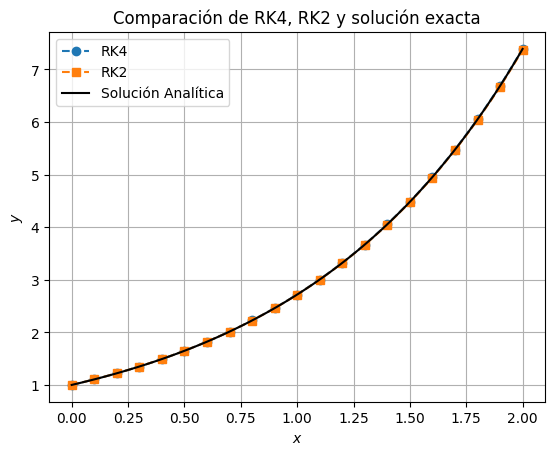

In [ ]:
# Definir la función de la EDO y su solución exacta
f = lambda x, y: y
f_exact = lambda x: np.exp(x)

# Parámetros del problema
x0 = 1e-6
x_end = 2
y0 = 1
h = 0.1

# Generar la solución exacta con suficientes puntos
x_exact = np.linspace(x0, x_end, 100)
y_exact = f_exact(x_exact)

# Resolver la EDO con RK4 y RK2
x_rk4, y_rk4 = RK4(f, x0, y0, h, x_end)
x_rk2, y_rk2 = RK2_midpoint(f, x0, y0, h, x_end)

# Graficar las soluciones
plt.plot(x_rk4, y_rk4, 'o--', label='RK4')  # 'o--' para ver los puntos calculados
plt.plot(x_rk2, y_rk2, 's--', label='RK2')  # 's--' para diferenciar RK2
plt.plot(x_exact, y_exact, label='Solución Analítica', color='black')  # Línea continua en negro

# Etiquetas y leyenda
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Comparación de RK4, RK2 y solución exacta')
plt.grid(True)
plt.show()


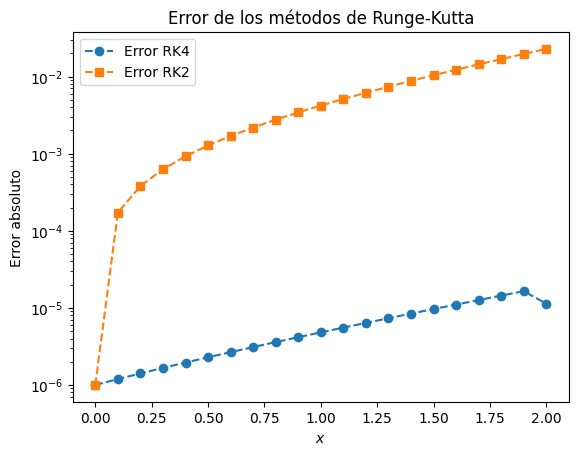

In [ ]:
# Calcular el error absoluto
error_rk4 = np.abs(y_rk4 - f_exact(x_rk4))
error_rk2 = np.abs(y_rk2 - f_exact(x_rk2))

# Graficar el error
plt.plot(x_rk4, error_rk4, 'o--', label='Error RK4')
plt.plot(x_rk2, error_rk2, 's--', label='Error RK2')
plt.xlabel('$x$')
plt.ylabel('Error absoluto')
plt.yscale('log')  # Escala logarítmica para visualizar mejor el error
plt.legend()
plt.title('Error de los métodos de Runge-Kutta')
plt.show()

# Error y Convergencia en el Método de Runge-Kutta de Orden 4

Su error global es del orden $O(h^4)$, mientras que su error de truncamiento local es del orden $O(h^5)$.

- **Error de truncamiento local:** Se refiere al error cometido en un solo paso de integración y es de orden $O(h^5)$.
- **Error global:** Acumulado a lo largo de la integración y de orden $O(h^4)$.

Esto significa que si el tamaño del paso $h$ se reduce a la mitad, el error global se reduce aproximadamente por un factor de $2^4 = 16$.

## **Convergencia del Método RK4**
El método RK4 es **consistente, estable y convergente**, lo que garantiza que la solución numérica se aproxima a la solución exacta a medida que el tamaño del paso $h \to 0$.

- **Consistencia:** Se satisface porque el error local de truncamiento es $O(h^5)$, lo que implica que el método aproxima correctamente la ecuación diferencial conforme $h$ disminuye.
- **Estabilidad:** Para problemas bien condicionados, el método mantiene una propagación controlada del error, asegurando que la solución numérica no diverja.
- **Convergencia:** Dado que el método es consistente y estable, converge a la solución exacta con una tasa de $O(h^4)$.








## Ejemplo orden 2: Oscilador armónico

**Problema:** Resolver la EDO de segundo orden
$$\frac{d^2y}{dx^2} + y = 0, \quad y(0) = 0, \quad y'(0) = 1$$

Esta ecuación describe un oscilador armónico simple con solución analítica $y = \sin(x)$.

**Conversión a sistema de primer orden:**
Definimos $y_1 = y$ y $y_2 = y'$, obteniendo:
$$\frac{dy_1}{dx} = y_2$$
$$\frac{dy_2}{dx} = -y_1$$

Con condiciones iniciales $y_1(0) = 0$ y $y_2(0) = 1$.

**Primer paso con $h = 0.1$:**

Para $y_1$:
1. $k_1 = h \cdot y_2(0) = 0.1 \cdot 1 = 0.1$
2. $k_2 = h \cdot y_2(0 + h/2) = 0.1 \cdot 1 = 0.1$ (ya que $y_2$ no ha cambiado aún en el punto medio)
3. $k_3 = h \cdot y_2(0 + h/2) = 0.1 \cdot 1 = 0.1$
4. $k_4 = h \cdot y_2(0 + h) = 0.1 \cdot 0.995 = 0.0995$ (usando el valor aproximado de $y_2$ al final del intervalo)
5. $y_1(0.1) = 0 + \frac{1}{6}(0.1 + 2 \cdot 0.1 + 2 \cdot 0.1 + 0.0995) = 0.09992$

Para $y_2$:
1. $k_1 = h \cdot (-y_1(0)) = 0.1 \cdot 0 = 0$
2. $k_2 = h \cdot (-y_1(0 + h/2)) = 0.1 \cdot (-0.05) = -0.005$
3. $k_3 = h \cdot (-y_1(0 + h/2)) = 0.1 \cdot (-0.05) = -0.005$
4. $k_4 = h \cdot (-y_1(0 + h)) = 0.1 \cdot (-0.09992) = -0.009992$
5. $y_2(0.1) = 1 + \frac{1}{6}(0 + 2 \cdot (-0.005) + 2 \cdot (-0.005) + (-0.009992)) = 0.995$

In [ ]:
# @title
def RK4(f, x0, y0, h, x_end):
    """
    Método de Runge-Kutta de 4º orden para sistemas de ecuaciones diferenciales.

    Args:
        f: Función que define el sistema de EDOs.
        x0: Valor inicial de x.
        y0: Vector de valores iniciales de y (np.array).
        h: Tamaño del paso.
        x_end: Valor final de x.

    Returns:
        x_points: Valores de x.
        y_points: Matriz con las aproximaciones de y en cada paso.
    """
    n = int(np.round((x_end - x0) / h))
    x_points = np.zeros(n+1)
    y_points = np.zeros((n+1, len(y0)))

    x_points[0] = x0
    y_points[0, :] = y0

    for i in range(n):
        x = x_points[i]
        y = y_points[i, :]

        k1 = h * f(x, y)
        k2 = h * f(x + h/2, y + k1/2)
        k3 = h * f(x + h/2, y + k2/2)
        k4 = h * f(x + h, y + k3)

        x_points[i+1] = x + h
        y_points[i+1, :] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    x_points[-1] = x_end  # Asegurar que el último punto es exactamente x_end
    return x_points, y_points

In [ ]:
def sistema(x, y):
    """
    Función que representa el sistema de ecuaciones diferenciales de primer orden
    correspondiente a la ecuación de un oscilador armónico simple:

        dy1/dx = y2
        dy2/dx = -y1

    Args:
        x: Variable independiente (en este caso, el tiempo o posición x). No se usa en este sistema,
           pero se incluye por compatibilidad con métodos numéricos como Runge-Kutta.
        y: Vector de estado en el que:
            y[0] representa y1 (la función y, es decir, la posición en el oscilador).
            y[1] representa y2 (la derivada de y1, es decir, la velocidad en el oscilador).

    Returns:
        dydt: Vector con las derivadas del estado:
            dydt[0] = y2  → la derivada de la posición es la velocidad.
            dydt[1] = -y1 → la derivada de la velocidad es la aceleración (con signo negativo,
                             debido a la ecuación del oscilador armónico).
    """
    dydt = np.zeros_like(y, dtype= float)  # Crear un vector del mismo tamaño que y para almacenar las derivadas
    dydt[0] = y[1]  # dy1/dx = y2  (posición' = velocidad)
    dydt[1] = -y[0]  # dy2/dx = -y1  (velocidad' = -posición)
    return dydt


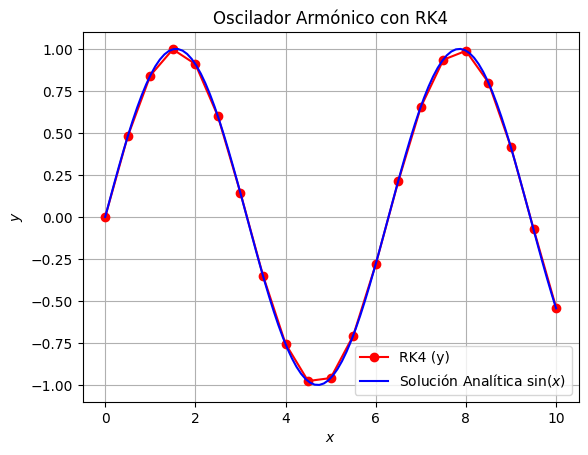

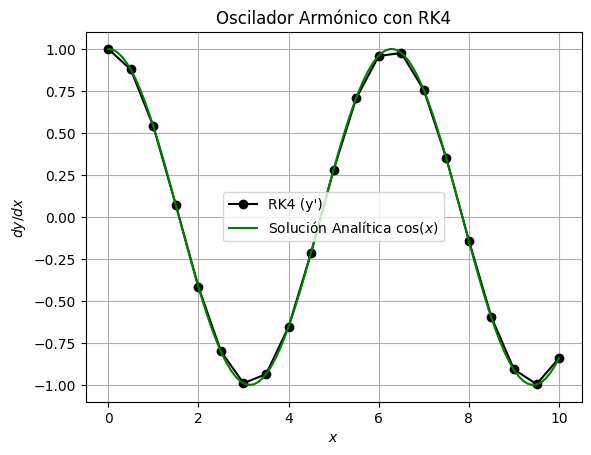

In [ ]:
# Condiciones iniciales
x0 = 0
y0 = np.array([0, 1])  # y1(0) = 0, y2(0) = 1
h = 0.5
x_end = 10

# Resolver con RK4
x_rk4, y_rk4 = RK4(sistema, x0, y0, h, x_end)

# Solución exacta
x_exact = np.linspace(x0, x_end, 100)
y_exact = np.sin(x_exact)
y_exact_p = np.cos(x_exact)

# Graficar resultados imaciones de y
plt.plot(x_exact, y_exact, label='Solución Analítica $\sin(x)$', color='blue')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Oscilador Armónico con RK4')
plt.grid(True)
plt.show()

plt.plot(x_rk4, y_rk4[:, 1], 'ko-', label='RK4 (y\')')  # y_points[:, 1] son las aproximaciones de y'
plt.plot(x_exact, y_exact_p, label='Solución Analítica $\cos(x)$', color='green')
plt.xlabel('$x$')
plt.ylabel('$dy/dx$')
plt.legend()
plt.title('Oscilador Armónico con RK4')
plt.grid(True)
plt.show()


## Ejemplo: Orden mayor

Resuelve la ecuación diferencial de tercer orden:  

$$ \frac{d^3y}{dx^3} + 2 \frac{d^2y}{dx^2} + 3 \frac{dy}{dx} + 4y = 0 $$

con las condiciones iniciales:  

$$ y(0) = 1, \quad y'(0) = 0, \quad y''(0) = -1. $$

#### **Conversión a un sistema de primer orden**  

Definimos las siguientes variables:  

$$ y_1 = y, \quad y_2 = \frac{dy}{dx}, \quad y_3 = \frac{d^2y}{dx^2}. $$

De esta forma, la ecuación original se reescribe como el siguiente sistema de ecuaciones de primer orden:  

$$ \frac{dy_1}{dx} = y_2, $$

$$ \frac{dy_2}{dx} = y_3, $$

$$ \frac{dy_3}{dx} = -2y_3 - 3y_2 - 4y_1. $$

Las condiciones iniciales quedan expresadas como:  

$$ y_1(0) = 1, \quad y_2(0) = 0, \quad y_3(0) = -1. $$

In [ ]:
def sistema(x, y):
    """
    Sistema de ecuaciones diferenciales de orden 3:
        dy1/dx = y2
        dy2/dx = y3
        dy3/dx = -2*y3 - 3*y2 - 4*y1
    """
    dydt = np.zeros_like(y, dtype= float)  # Crear un vector con la misma forma que y

    dydt[0] = y[1]           # dy1/dx = y2
    dydt[1] = y[2]           # dy2/dx = y3
    dydt[2] = -2*y[2] - 3*y[1] - 4*y[0]  # dy3/dx = -2*y3 - 3*y2 - 4*y1

    return dydt


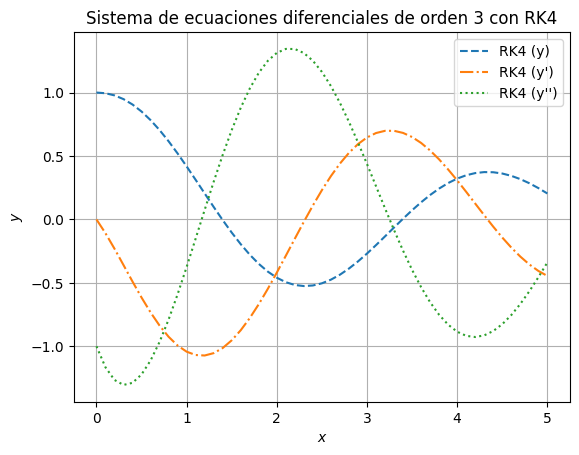

In [ ]:
# Condiciones iniciales
x0 = 0
x_end = 5
y0 = np.array([1, 0, -1], dtype = float)  # y1(0) = 1, y2(0) = 0, y3(0) = -1
h = 0.1

x_rk4, y_rk4 = RK4(sistema, x0, y0, h, x_end)

plt.plot(x_rk4, y_rk4[:, 0], '--', label='RK4 (y)')
plt.plot(x_rk4, y_rk4[:, 1], '-.', label='RK4 (y\')')
plt.plot(x_rk4, y_rk4[:, 2], ':', label='RK4 (y\'\')')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Sistema de ecuaciones diferenciales de orden 3 con RK4')
plt.grid(True)
plt.show()


# Resolución de Ecuaciones Diferenciales Ordinarias con `solve_ivp`

La función `scipy.integrate.solve_ivp` [(ver enlace)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) se usa para resolver ecuaciones diferenciales ordinarias (EDO) de primer orden, o sistemas de EDO de orden superior transformados en sistemas de primer orden.

## **Sintaxis básica**
```python
from scipy.integrate import solve_ivp

sol = solve_ivp(func, t_span, y0, method='RK45', t_eval=None)
```

- `func`: Función que define la EDO o sistema de ecuaciones.
- `t_span`: Tupla `(t0, tf)` con el intervalo de integración.
- `y0`: Lista o array con las condiciones iniciales.
- `method`: Método numérico (opcional, ver lista abajo).
- `t_eval`: Puntos específicos en los que evaluar la solución.

## **Métodos disponibles**
- `'RK45'`: Runge-Kutta de orden 4(5) (por defecto).
- `'RK23'`: Runge-Kutta de orden 2(3), más eficiente para problemas rígidos.
- `'Radau'`: Método implícito de Radau (adecuado para problemas rígidos).
- `'BDF'`: Método de diferencias retroactivas (bueno para problemas rígidos).
- `'LSODA'`: Alterna entre métodos explícitos e implícitos según la rigidez.

## **Ejemplo: EDO simple**
Resolver la ecuación:

$$ \frac{dy}{dx} = -2y, \quad y(0) = 1 $$



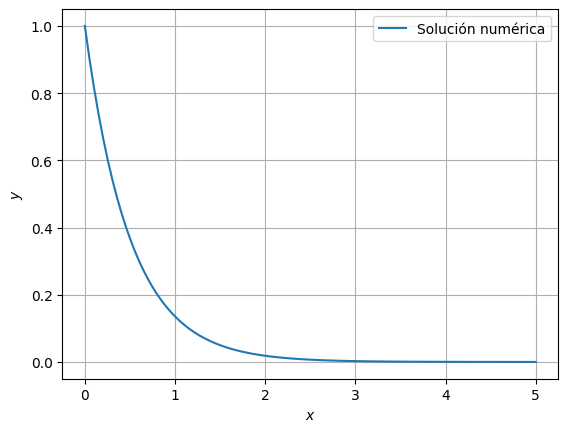

In [ ]:
# Definir la función de la EDO
def edo(t, y):
    return -2*y

# Intervalo y condición inicial
t_span = (0, 5)
y0 = [1]

# Resolver con solve_ivp
sol = solve_ivp(edo, t_span, y0, method='RK45', t_eval=np.linspace(0, 5, 100))

# Graficar la solución
plt.plot(sol.t, sol.y[0], label="Solución numérica")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()

## Ejemplo: Orden mayor

Resuelve la ecuación diferencial de tercer orden:  

$$ \frac{d^3y}{dx^3} + 2 \frac{d^2y}{dx^2} + 3 \frac{dy}{dx} + 4y = 0 $$

con las condiciones iniciales:  

$$ y(0) = 1, \quad y'(0) = 0, \quad y''(0) = -1. $$

#### **Conversión a un sistema de primer orden**  

Definimos las siguientes variables:  

$$ y_1 = y, \quad y_2 = \frac{dy}{dx}, \quad y_3 = \frac{d^2y}{dx^2}. $$

De esta forma, la ecuación original se reescribe como el siguiente sistema de ecuaciones de primer orden:  

$$ \frac{dy_1}{dx} = y_2, $$

$$ \frac{dy_2}{dx} = y_3, $$

$$ \frac{dy_3}{dx} = -2y_3 - 3y_2 - 4y_1. $$

Las condiciones iniciales quedan expresadas como:  

$$ y_1(0) = 1, \quad y_2(0) = 0, \quad y_3(0) = -1. $$



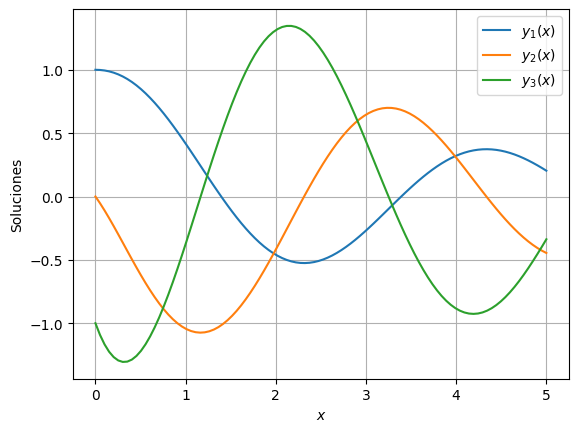

In [ ]:
# Definir la función del sistema de ecuaciones
def sistema(t, y):
    dydt = np.zeros_like(y, dtype = float)
    dydt[0] = y[1]
    dydt[1] = y[2]
    dydt[2] = -2*y[2] - 3*y[1] - 4*y[0]
    return dydt

# Intervalo de integración y condiciones iniciales
t_span = (0, 5)
y0 = [1, 0, -1]

# Puntos de evaluación
t_eval = np.linspace(0, 5, 100)

# Resolver con solve_ivp
sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval)

# Graficar las soluciones
plt.plot(sol.t, sol.y[0], label="$y_1(x)$")
plt.plot(sol.t, sol.y[1], label="$y_2(x)$")
plt.plot(sol.t, sol.y[2], label="$y_3(x)$")
plt.xlabel("$x$")
plt.ylabel("Soluciones")
plt.legend()
plt.grid()
plt.show()